## Project description
You work for the online store Ice, which sells video games all over the world. User and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales are available from open sources. You need to identify patterns that determine whether a game succeeds or not. This will allow you to spot potential big winners and plan advertising campaigns.

Data description

—Name

—Platform

—Year_of_Release

—Genre

—NA_sales (North American sales in USD million)

—EU_sales (sales in Europe in USD million)

—JP_sales (sales in Japan in USD million)

—Other_sales (sales in other countries in USD million)

—Critic_Score (maximum of 100)

—User_Score (maximum of 10)

—Rating (ESRB)


In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
pip install sidetable

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 11.3 MB 1.6 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
import sidetable

In [4]:
games = pd.read_csv('/datasets/games.csv')

In [5]:
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [6]:
games.tail()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


To check if the data has a certain order, I looked at both the head and the tail. This way you can see if there is a certain template according to which the data is arranged

In [7]:
games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [8]:
games.describe(include=('object'))

,Name,Platform,Genre,User_Score,Rating
count,16713,16715,16713,10014,9949
unique,11559,31,12,96,8
top,Need for Speed: Most Wanted,PS2,Action,tbd,E
freq,12,2161,3369,2424,3990


In [9]:
games = games.rename(columns=str.lower)

In [10]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [11]:
games_year = games.query('year_of_release != ("nan")')

In [12]:
games_name_dict = dict(zip(games['name'],games_year['year_of_release']))

In [13]:
games['year_of_release'] =games['year_of_release'].fillna(games['name'].map(games_name_dict))

In [14]:
games_year = games.query('year_of_release != ("nan")')

In [15]:
games_name_dict = dict(zip(games['name'],games_year['year_of_release']))

In [16]:
games['year_of_release'] =games['year_of_release'].fillna(games['name'].map(games_name_dict))

In [17]:
games = games.dropna(subset = ['year_of_release'])

In [18]:
games['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000., 1995., 1991., 1981., 1987., 1980.,
       1983.])

In [19]:
games['year_of_release'] = games['year_of_release'].astype(int)

To fill in the missing values in the 'year_of_release' column I created a dictionary with the 'name' column. And I filled in the missing values according to the dictionary.

I initially changed the year_of_release column from float64 to int because we're talking about years here so it's always an integer. Then I changed the user_score column from object to float because this column contains numbers and it will be easier to work with numbers than with object

In [20]:
games.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [21]:
type(games['user_score'].unique()[1])

float

In [22]:
games['user_score'] = games['user_score'].replace('tbd',"NaN")

In [23]:
games['user_score']= games['user_score'].astype('float')

In [24]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16715 non-null int64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float64
rating             9949 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [25]:
games.stb.missing(style=True)

,missing,total,percent
user_score,"9,125","16,715",54.59%
critic_score,"8,578","16,715",51.32%
rating,"6,766","16,715",40.48%
name,2,"16,715",0.01%
genre,2,"16,715",0.01%
platform,0,"16,715",0.00%
year_of_release,0,"16,715",0.00%
na_sales,0,"16,715",0.00%
eu_sales,0,"16,715",0.00%
jp_sales,0,"16,715",0.00%


In [26]:
games = games.dropna(subset=['name'])

In [27]:
games = games.dropna(subset=['genre'])

I chose to delete the rows with the missing information in the 'name' & 'genre'column because there were only two rows with missing information and there would be no effect on the data

I must say I do not understand what the problem is? The code I wrote deleted the empty cells. And if I use the code you wrote it does not work properly

In [28]:
games.stb.missing(style=True)

,missing,total,percent
user_score,"9,123","16,713",54.59%
critic_score,"8,576","16,713",51.31%
rating,"6,764","16,713",40.47%
name,0,"16,713",0.00%
platform,0,"16,713",0.00%
year_of_release,0,"16,713",0.00%
genre,0,"16,713",0.00%
na_sales,0,"16,713",0.00%
eu_sales,0,"16,713",0.00%
jp_sales,0,"16,713",0.00%


In [29]:
games.dropna(subset=['name', 'genre', 'year_of_release'], inplace = True)

In [30]:
games.stb.missing(style=True)

,missing,total,percent
user_score,"9,123","16,713",54.59%
critic_score,"8,576","16,713",51.31%
rating,"6,764","16,713",40.47%
name,0,"16,713",0.00%
platform,0,"16,713",0.00%
year_of_release,0,"16,713",0.00%
genre,0,"16,713",0.00%
na_sales,0,"16,713",0.00%
eu_sales,0,"16,713",0.00%
jp_sales,0,"16,713",0.00%


In [31]:
games['name'].count()

16713

Because the remaining missing data is numerous and can have an impact on the rest of the data I can not delete them.

In [32]:
games['critic_score'].describe()

count    8137.000000
mean       68.967679
std        13.938165
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

In [33]:
games[games.user_score=='tbd']['year_of_release'].value_counts()

/opt/conda/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


Series([], Name: year_of_release, dtype: int64)

In [34]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16713 non-null int64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float64
rating             9949 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [35]:
games_name_platform_dict = dict(zip(games['name'],games_year['platform']))

In [36]:
games_critic_dict = dict(zip(games_name_platform_dict,games['critic_score']))

In [37]:
games['critic_score'] =games['critic_score'].fillna(games['name'].map(games_critic_dict))

In [38]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16713 non-null int64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       12785 non-null float64
user_score         7590 non-null float64
rating             9949 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [39]:
games_user_dict = dict(zip(games_name_platform_dict,games['user_score']))

In [40]:
games['user_score'] =games['user_score'].fillna(games['name'].map(games_user_dict))

In [41]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

In [42]:
games.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31


In [43]:
games.duplicated().sum()

0

In [44]:
games.stb.missing(style=True)

,missing,total,percent
rating,"6,764","16,713",40.47%
user_score,"4,454","16,713",26.65%
critic_score,"3,928","16,713",23.50%
name,0,"16,713",0.00%
platform,0,"16,713",0.00%
year_of_release,0,"16,713",0.00%
genre,0,"16,713",0.00%
na_sales,0,"16,713",0.00%
eu_sales,0,"16,713",0.00%
jp_sales,0,"16,713",0.00%


## Analyze the data

In [45]:
games.stb.freq(['year_of_release'], style=True, cum_cols=False)

,year_of_release,count,percent
0,2009,"1,447",8.66%
1,2008,"1,443",8.63%
2,2010,"1,280",7.66%
3,2007,"1,211",7.25%
4,2011,"1,171",7.01%
5,2006,"1,029",6.16%
6,2005,964,5.77%
7,2002,836,5.00%
8,2003,784,4.69%
9,2004,774,4.63%


In [46]:
df= games[['year_of_release','name']].groupby('year_of_release').count().sort_values(by= 'year_of_release').reset_index()
df

,year_of_release,name
0,1980,9
1,1981,47
2,1982,36
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


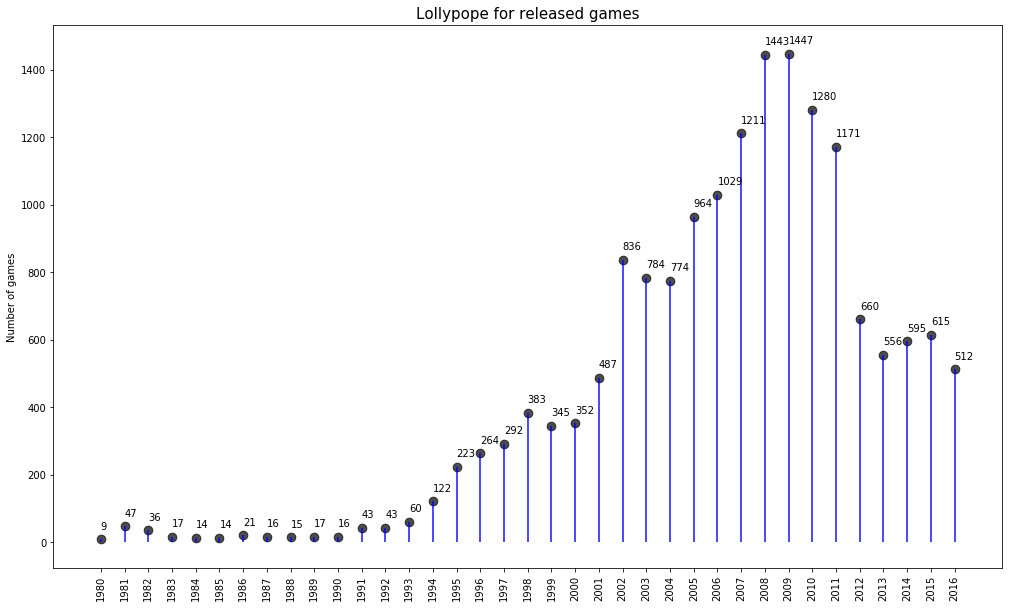

In [47]:
fig,ax = plt.subplots(figsize=(17,10))
ax.vlines(x=df.year_of_release, ymin=0, ymax=df.name, color='blue', alpha=0.7, linewidth= 2)
ax.scatter(x=df.year_of_release, y=df.name, s=75, color='black', alpha=0.7)

ax.set_title('Lollypope for released games', fontdict={'size':15})
ax.set_ylabel('Number of games')
ax.set_xticks(df.year_of_release)
ax.set_xticklabels(df.year_of_release, rotation=90)

for row in df.itertuples():
    ax.text(row.year_of_release, row.name+30, s=row.name)


It can be seen that there is an increase in the number of games coming out from year to year but starting in 2009 there is a decrease in the amount of games released every year

Now I want to check how sales have changed from platform to platform

In [48]:
df= games[['platform','total_sales']].groupby('platform').count().sort_values(by= 'total_sales').reset_index()
df

,platform,total_sales
0,GG,1
1,PCFX,1
2,TG16,2
3,3DO,3
4,WS,6
5,SCD,6
6,NG,12
7,GEN,27
8,DC,52
9,GB,98


In [49]:
df['sales_var'] = (df['total_sales']-df['total_sales'].mean())/df['total_sales'].std()
df

,platform,total_sales,sales_var
0,GG,1,-0.857283
1,PCFX,1,-0.857283
2,TG16,2,-0.855689
3,3DO,3,-0.854096
4,WS,6,-0.849317
5,SCD,6,-0.849317
6,NG,12,-0.839759
7,GEN,27,-0.815862
8,DC,52,-0.776035
9,GB,98,-0.702754


From looking at the variance of the different platforms it can be seen that there are platforms that sell much more than average and therefore their variance is high

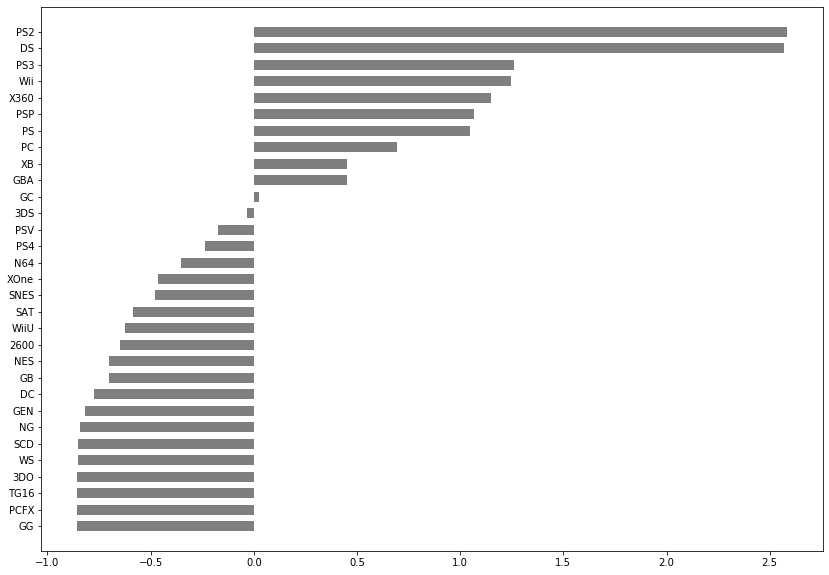

In [50]:
plt.figure(figsize=(14,10))
plt.hlines(y=df.platform, xmax=df.sales_var, xmin=0, alpha=0.5, linewidth=10)

I want to check which platform had the most sales

In [51]:
df.nlargest(5,['total_sales'])

,platform,total_sales,sales_var
30,PS2,2161,2.583770
29,DS,2151,2.567839
28,PS3,1331,1.261514
27,Wii,1320,1.243990
26,X360,1262,1.151591


Since ps2 is the platform with the most sales I currently want to focus on it and test its distribution over the years. To do this I will slice the data

In [52]:
ps2 = games.query('platform==("PS2")')

In [53]:
ds = games.query('platform==("DS")')

In [54]:
ps3 = games.query('platform==("PS3")')

In [55]:
data= ps2[['year_of_release','total_sales']].groupby('year_of_release').sum().sort_values(by= 'year_of_release').reset_index()
data

,year_of_release,total_sales
0,1995,0.06
1,1997,0.23
2,1999,1.12
3,2000,39.38
4,2001,169.43
5,2002,205.63
6,2003,184.31
7,2004,213.55
8,2005,160.66
9,2006,104.84


In [56]:
data_ds= ds[['year_of_release','total_sales']].groupby('year_of_release').sum().sort_values(by= 'year_of_release').reset_index()
data_ds

,year_of_release,total_sales
0,1985,0.02
1,2001,0.09
2,2002,0.33
3,2003,0.31
4,2004,17.27
5,2005,131.04
6,2006,119.88
7,2007,146.96
8,2008,145.38
9,2009,119.55


In [57]:
data_ps3= ps3[['year_of_release','total_sales']].groupby('year_of_release').sum().sort_values(by= 'year_of_release').reset_index()
data_ps3

,year_of_release,total_sales
0,1991,0.38
1,1995,0.48
2,1999,2.58
3,2002,0.15
4,2005,1.06
5,2006,20.98
6,2007,73.26
7,2008,118.52
8,2009,131.17
9,2010,142.97


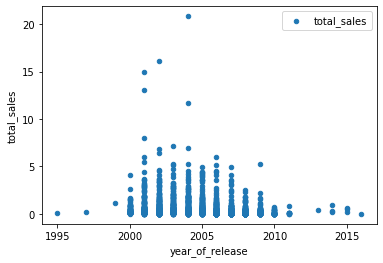

In [58]:
ps2.plot(x='year_of_release', y='total_sales', kind='scatter',label='total_sales')

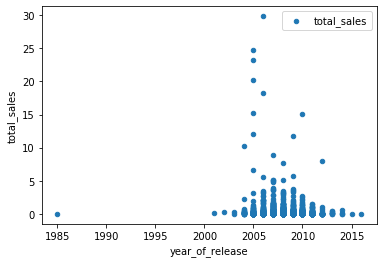

In [59]:
ds.plot(x='year_of_release', y='total_sales', kind='scatter',label='total_sales')

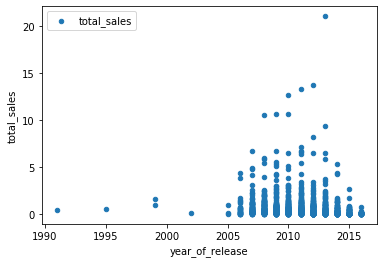

In [60]:
ps3.plot(x='year_of_release', y='total_sales', kind='scatter',label='total_sales')

I'm now looking for a platform that sold in the past but is now without sales.

In [61]:
df=games[ games.year_of_release > 2000 ] 

In [62]:
life_time= df.groupby(['platform'])['year_of_release'].agg(['min','max'])
life_time['age'] = life_time['max'] - life_time['min']
life_time=life_time.reset_index()
life_time.sort_values(by='min')

,platform,min,max,age
10,PS2,2001,2016,15
1,3DS,2001,2016,15
2,DC,2001,2008,7
3,DS,2001,2016,15
4,GB,2001,2007,6
5,GBA,2001,2012,11
6,GC,2001,2016,15
7,N64,2001,2009,8
8,PC,2001,2016,15
9,PS,2001,2015,14


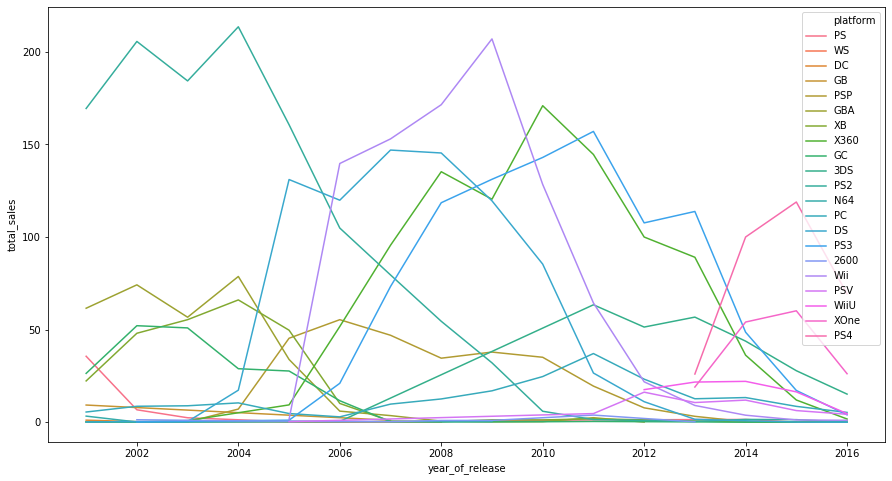

In [63]:
life_cycle= df.groupby(['platform','year_of_release'])['total_sales'].sum().reset_index().sort_values(by='year_of_release')
plt.figure(figsize=(15,8))
ax = sns.lineplot(data=life_cycle, x='year_of_release', y='total_sales', hue='platform')

PS2 distribution over the years

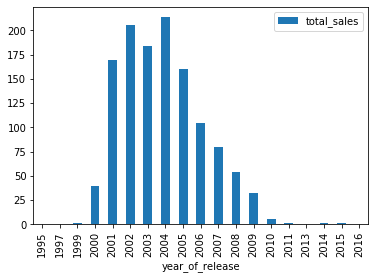

In [64]:
data.plot(x='year_of_release', y='total_sales', kind='bar',label='total_sales')

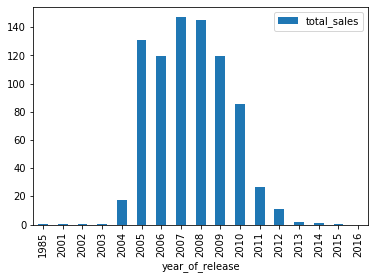

In [65]:
data_ds.plot(x='year_of_release', y='total_sales', kind='bar',label='total_sales')

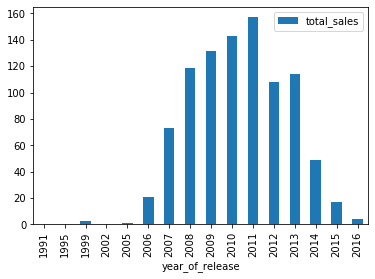

In [66]:
data_ps3.plot(x='year_of_release', y='total_sales', kind='bar',label='total_sales')

Any platform in the table whose max value is less than 2016 and whose age is greater than 0 meets the definition of a platform that sold in the past but now has 0 sales for exampel PS

The average "life time" of a platform

In [67]:
life_time['age'].mean()

10.571428571428571

If we look at the lollipop graph it can be seen that since 2001 there has been a serious increase in the number of games that have hit the market so I am looking at the data starting from 2001

In [68]:
games_updat=games[games.year_of_release > 2014 ] 

In [69]:
df = pd.pivot_table(games_updat, index='year_of_release', columns='platform', values='total_sales', aggfunc='sum', fill_value=0)
df

platform,3DS,DS,GC,PC,PS,PS2,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,
2015,27.78,0.06,0.00,8.52,0.04,1.35,17.11,118.90,0.12,6.25,1.19,16.35,11.96,0.06,60.14
2016,15.14,0.01,0.02,5.25,0.00,0.04,3.95,69.25,0.84,4.25,1.00,4.60,1.70,0.00,26.15


In [70]:
trend = ((df/df.shift(+1))-1).T
trend

year_of_release,2015,2016
platform,,
3DS,NaN,-0.455004
DS,NaN,-0.833333
GC,NaN,inf
PC,NaN,-0.383803
PS,NaN,-1.000000
PS2,NaN,-0.970370
PS3,NaN,-0.769141
PS4,NaN,-0.417578
PSP,NaN,6.000000


So that I can see the data in a visual and easier way to understand, I will create a heat map from which it will be possible to understand which platforms are growing and which are shrinking.

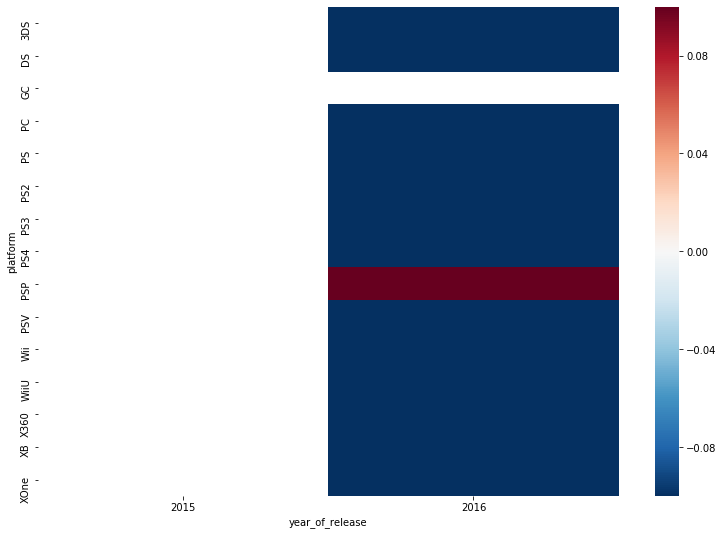

In [71]:
plt.figure(figsize=(13,9))
sns.heatmap(trend, cmap= 'RdBu_r')

From the heat map it can be seen that a platform such as WII is shrinking consistently so it seems that the sales of the platform are in a consistent decline. However, a platform such as PSP seems to be starting to grow again in total sales after a few years of declining sales. So if I had to choose platforms that have potential I would choose PSP 

Build a box plot for the global sales of all games, broken down by platform

In [72]:
sales_game = games_updat.groupby(['platform', 'name'])['total_sales'].sum().reset_index()
sales_game

,platform,name,total_sales
0,3DS,Beyblade Burst,0.03
1,3DS,Fire Emblem Fates,1.67
2,3DS,Haikyu!! Cross Team Match!,0.04
3,3DS,12-Sai. Koisuru Diary,0.05
4,3DS,3DS Classic Collection,0.03
...,...,...,...
1122,XOne,Wolfenstein: The Old Blood,0.15
1123,XOne,Worms: WMD,0.01
1124,XOne,XCOM 2,0.04
1125,XOne,ZombiU,0.01


In [73]:
order = sales_game.groupby(['platform'])['total_sales'].sum().reset_index().sort_values(by='total_sales')['platform']
order

2       GC
4       PS
13      XB
1       DS
8      PSP
5      PS2
10     Wii
9      PSV
12    X360
3       PC
11    WiiU
6      PS3
0      3DS
14    XOne
7      PS4
Name: platform, dtype: object

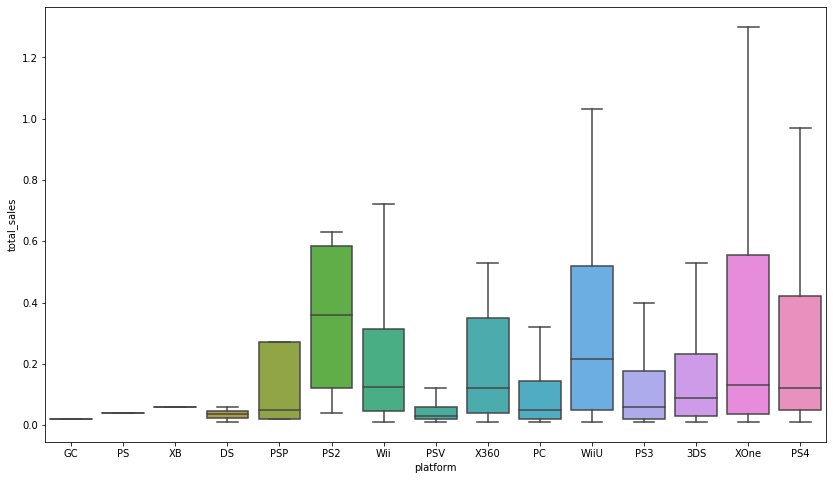

In [74]:
plt.figure(figsize=(14,8))
ax = sns.boxplot(x='platform',y='total_sales', data= sales_game, order=order ,showfliers = False )

In [75]:
sales_game.pivot_table(index='platform', values='total_sales', aggfunc='mean' )

,total_sales
platform,
3DS,0.325152
DS,0.035000
GC,0.020000
PC,0.132404
PS,0.040000
PS2,0.347500
PS3,0.181552
PS4,0.625083
PSP,0.240000


From looking at the box plot it can be seen that there are platforms with large distribution and  other platforms where the distribution is relatively small. I arranged the graph so I could get an idea of which platform sold the most. However average sales do not differ much from platform to platform (except for a few exceptions).

how user and professional reviews affect sales for one popular platform.  I will examine the impact of the score on sales on the PS2 platform

In [76]:
ps2_score = games.query('platform==("PS2")')

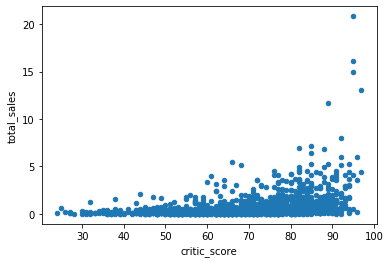

In [77]:
ps2_score.plot(x='critic_score', y='total_sales', kind='scatter')

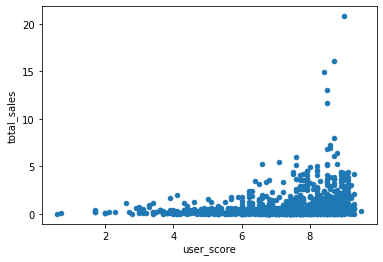

In [78]:
ps2_score.plot(x='user_score', y='total_sales', kind='scatter')

In [79]:
ps2_score.corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
year_of_release,1.000000,-0.146332,-0.195398,-0.097669,0.005522,-0.046800,-0.056693,-0.152061
na_sales,-0.146332,1.000000,0.654672,0.197182,0.566580,0.342590,0.184968,0.920762
eu_sales,-0.195398,0.654672,1.000000,0.224017,0.307067,0.275055,0.141393,0.781918
jp_sales,-0.097669,0.197182,0.224017,1.000000,0.175200,0.191737,0.101788,0.398318
other_sales,0.005522,0.566580,0.307067,0.175200,1.000000,0.199637,0.088803,0.714651
critic_score,-0.046800,0.342590,0.275055,0.191737,0.199637,1.000000,0.533180,0.353894
user_score,-0.056693,0.184968,0.141393,0.101788,0.088803,0.533180,1.000000,0.183038
total_sales,-0.152061,0.920762,0.781918,0.398318,0.714651,0.353894,0.183038,1.000000


When looking at the correlation between sales and score it can be seen that there is indeed a positive correlation between sales and score. The critic_score's correlation for sales is higher than the user_score's correlation. Another thing that can be seen is that the score affects people in North America more than people in Europe and Japan. In terms of distribution there is not much difference between the scores but you definitely see an increase in sales the higher the score

In [80]:
Wii_score = games.query('platform==("Wii")')

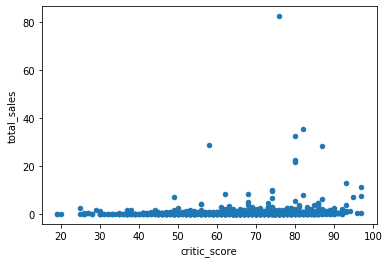

In [81]:
Wii_score.plot(x='critic_score', y='total_sales', kind='scatter')

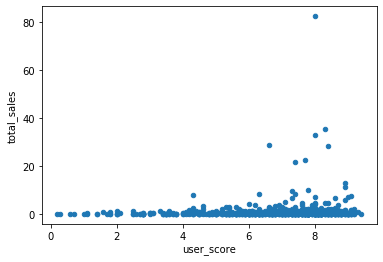

In [82]:
Wii_score.plot(x='user_score', y='total_sales', kind='scatter')

In [83]:
Wii_score.corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
year_of_release,1.000000,-0.080015,-0.060489,-0.043753,-0.076150,0.122172,0.047053,-0.071484
na_sales,-0.080015,1.000000,0.971748,0.769498,0.988288,0.120601,0.073032,0.992588
eu_sales,-0.060489,0.971748,1.000000,0.775901,0.992596,0.109341,0.062562,0.989535
jp_sales,-0.043753,0.769498,0.775901,1.000000,0.769197,0.132379,0.094317,0.813626
other_sales,-0.076150,0.988288,0.992596,0.769197,1.000000,0.107524,0.063963,0.995140
critic_score,0.122172,0.120601,0.109341,0.132379,0.107524,1.000000,0.527747,0.119559
user_score,0.047053,0.073032,0.062562,0.094317,0.063963,0.527747,1.000000,0.072390
total_sales,-0.071484,0.992588,0.989535,0.813626,0.995140,0.119559,0.072390,1.000000


It can be clearly seen that the effect of the score on sales on this platform is much smaller than on the PS2

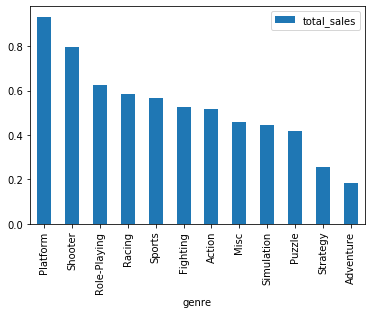

In [84]:
games.pivot_table(index='genre', values='total_sales' ,aggfunc='mean' ).sort_values('total_sales', ascending=False).plot(kind='bar')

In [85]:
games.pivot_table(index='genre', values=['total_sales','year_of_release'] ,aggfunc='mean' ).sort_values('total_sales', ascending=False)

,total_sales,year_of_release
genre,,
Platform,0.932173,2003.905405
Shooter,0.795503,2006.087680
Role-Playing,0.623872,2007.126168
Racing,0.583403,2004.940753
Sports,0.566980,2005.545571
Fighting,0.527126,2004.672556
Action,0.517711,2008.013654
Misc,0.458577,2007.336571
Simulation,0.446701,2006.698740


The genre that sells best on average seems to be a platform. And the genre that sold the least average is adventure. It's hard for me to say why the genres sold like this but it seems that the oldest genre is the genre that sold best on average while the genre in which the games are newest on average sold the least

## Create a user profile for each region

In [86]:
na = games.groupby(['platform'])['na_sales'].sum().reset_index().sort_values(by='na_sales', ascending=False).head()
na

,platform,na_sales
28,X360,602.47
16,PS2,583.84
26,Wii,496.90
17,PS3,393.49
4,DS,382.40


In [87]:
na = games.groupby(['platform'])['na_sales'].mean().reset_index().sort_values(by='na_sales', ascending=False).head()
na

,platform,na_sales
11,NES,1.285102
5,GB,1.166531
8,GEN,0.713704
0,2600,0.681203
28,X360,0.477393


In [88]:
na_m = games.groupby(['platform'])['na_sales'].median().reset_index().sort_values(by='na_sales', ascending=False).head()
na

,platform,na_sales
11,NES,1.285102
5,GB,1.166531
8,GEN,0.713704
0,2600,0.681203
28,X360,0.477393


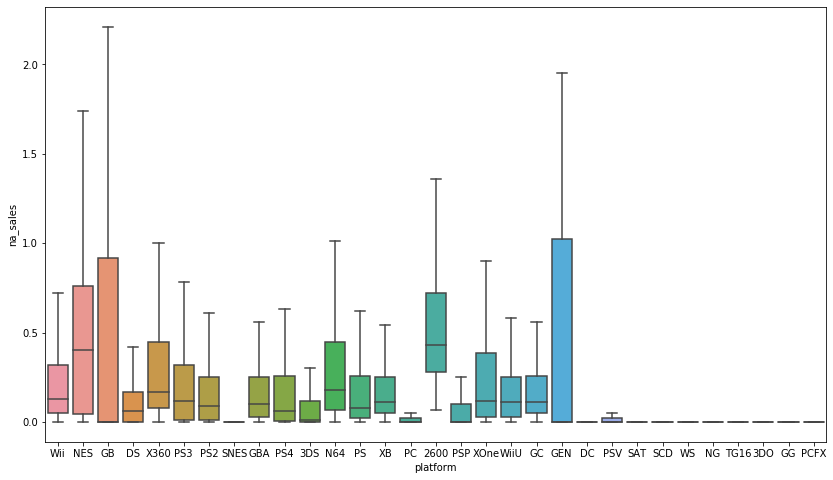

In [89]:
plt.figure(figsize=(14,8))
ax = sns.boxplot(x='platform',y='na_sales', data= games, showfliers = False )

In [90]:
eu = games.groupby(['platform'])['eu_sales'].sum().reset_index().sort_values(by='eu_sales', ascending=False).head()
eu

,platform,eu_sales
16,PS2,339.29
17,PS3,330.29
28,X360,270.76
26,Wii,262.21
15,PS,213.61


In [91]:
eu = games.groupby(['platform'])['eu_sales'].mean().reset_index().sort_values(by='eu_sales', ascending=False).head()
eu

,platform,eu_sales
5,GB,0.487959
18,PS4,0.359923
17,PS3,0.248152
11,NES,0.215816
28,X360,0.214548


In [92]:
eu_m = games.groupby(['platform'])['eu_sales'].median().reset_index().sort_values(by='eu_sales', ascending=False).head()
eu

,platform,eu_sales
5,GB,0.487959
18,PS4,0.359923
17,PS3,0.248152
11,NES,0.215816
28,X360,0.214548


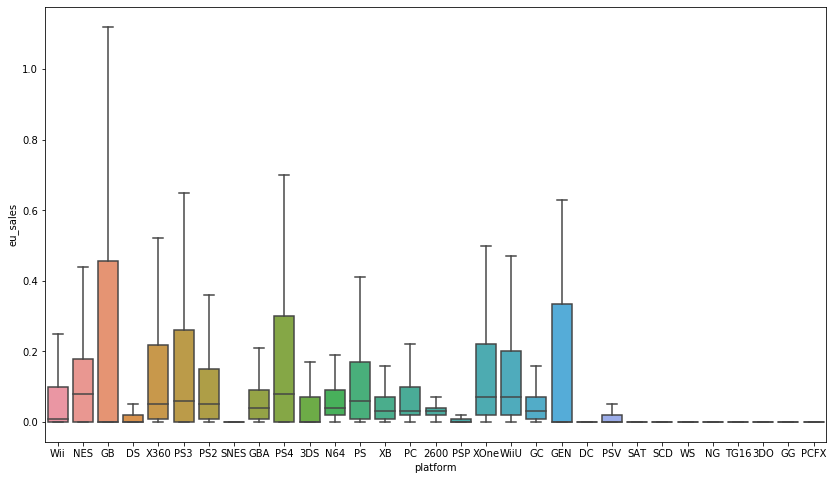

In [93]:
plt.figure(figsize=(14,8))
ax = sns.boxplot(x='platform',y='eu_sales', data= games, showfliers = False )

In [94]:
jp = games.groupby(['platform'])['jp_sales'].sum().reset_index().sort_values(by='jp_sales', ascending=False).head()
jp

,platform,jp_sales
4,DS,175.57
15,PS,139.82
16,PS2,139.20
23,SNES,116.55
2,3DS,100.67


In [95]:
jp = games.groupby(['platform'])['jp_sales'].mean().reset_index().sort_values(by='jp_sales', ascending=False).head()
jp

,platform,jp_sales
11,NES,1.006633
5,GB,0.868571
23,SNES,0.487657
25,WS,0.236667
2,3DS,0.193596


In [96]:
jp_m = games.groupby(['platform'])['jp_sales'].median().reset_index().sort_values(by='jp_sales', ascending=False).head()
jp

,platform,jp_sales
11,NES,1.006633
5,GB,0.868571
23,SNES,0.487657
25,WS,0.236667
2,3DS,0.193596


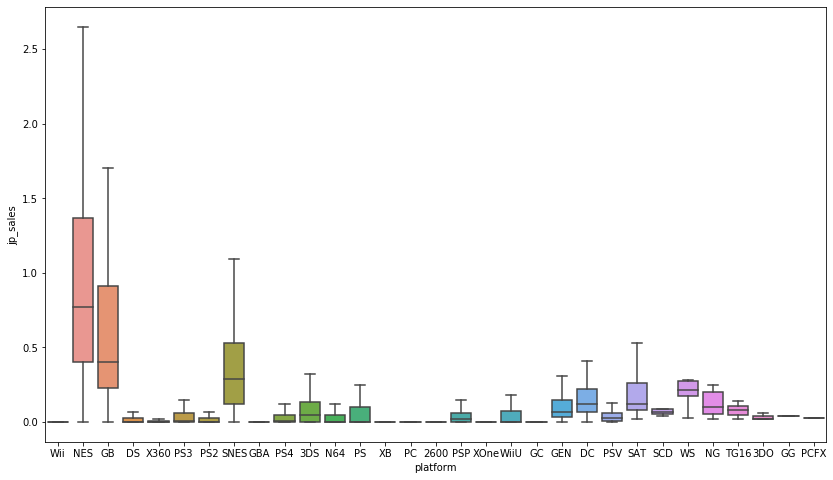

In [97]:
plt.figure(figsize=(14,8))
ax = sns.boxplot(x='platform',y='jp_sales', data= games, showfliers = False )

In [98]:
na_eu = na.merge(eu, how='outer', on=['platform'])
na_eu

,platform,na_sales,eu_sales
0,NES,1.285102,0.215816
1,GB,1.166531,0.487959
2,GEN,0.713704,NaN
3,2600,0.681203,NaN
4,X360,0.477393,0.214548
5,PS4,NaN,0.359923
6,PS3,NaN,0.248152


In [99]:
na_eu_jp= jp.merge(na_eu, how='outer', on=['platform'])
na_eu_jp

,platform,jp_sales,na_sales,eu_sales
0,NES,1.006633,1.285102,0.215816
1,GB,0.868571,1.166531,0.487959
2,SNES,0.487657,NaN,NaN
3,WS,0.236667,NaN,NaN
4,3DS,0.193596,NaN,NaN
5,GEN,NaN,0.713704,NaN
6,2600,NaN,0.681203,NaN
7,X360,NaN,0.477393,0.214548
8,PS4,NaN,NaN,0.359923
9,PS3,NaN,NaN,0.248152


In [100]:
na = games.groupby(['genre'])['na_sales'].sum().reset_index().sort_values(by='na_sales', ascending=False).head()
na

,genre,na_sales
0,Action,879.01
10,Sports,684.43
8,Shooter,592.24
4,Platform,445.50
3,Misc,407.27


In [101]:
eu = games.groupby(['genre'])['eu_sales'].sum().reset_index().sort_values(by='eu_sales', ascending=False).head()
eu

,genre,eu_sales
0,Action,519.13
10,Sports,376.79
8,Shooter,317.34
6,Racing,236.51
3,Misc,212.74


In [102]:
jp = games.groupby(['genre'])['jp_sales'].sum().reset_index().sort_values(by='jp_sales', ascending=False).head()
jp

,genre,jp_sales
7,Role-Playing,355.41
0,Action,161.43
10,Sports,135.54
4,Platform,130.83
3,Misc,108.11


In North America and Europe the leading genres seem to be the same while in Japan the genres are different. This can perhaps be explained by cultural differences that lead to different preferences of game genres. While in North America and Europe the culture is similar in Japan it is a completely different culture

In [103]:
games['rating'] = games['rating'].fillna('unknown')

In [104]:
na = games.groupby(['rating'])['na_sales'].mean().reset_index().sort_values(by='na_sales', ascending=False).head()
na

,rating,na_sales
0,AO,1.260000
4,K-A,0.853333
5,M,0.478874
1,E,0.324058
7,T,0.256586


In [105]:
na = games.groupby(['rating'])['na_sales'].sum().reset_index().sort_values(by='na_sales', ascending=False).head()
na

,rating,na_sales
1,E,1292.99
8,unknown,1240.68
7,T,759.75
5,M,748.48
2,E10+,353.32


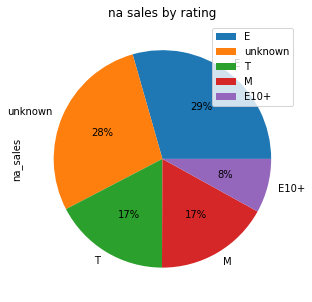

In [106]:
plot = na.plot.pie(y='na_sales', autopct='%1.0f%%',title='na sales by rating', labels=na['rating'], figsize=(5, 5))

In [107]:
eu = games.groupby(['rating'])['eu_sales'].mean().reset_index().sort_values(by='eu_sales', ascending=False).head()
eu

,rating,eu_sales
0,AO,0.610000
5,M,0.309642
1,E,0.178008
7,T,0.144218
2,E10+,0.132761


In [108]:
eu = games.groupby(['rating'])['eu_sales'].sum().reset_index().sort_values(by='eu_sales', ascending=False).head()
eu

,rating,eu_sales
1,E,710.25
8,unknown,613.30
5,M,483.97
7,T,427.03
2,E10+,188.52


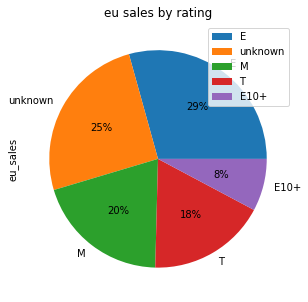

In [109]:
plot = eu.plot.pie(y='eu_sales', autopct='%1.0f%%',title='eu sales by rating', labels=eu['rating'], figsize=(5, 5))

In [110]:
jp = games.groupby(['rating'])['jp_sales'].mean().reset_index().sort_values(by='jp_sales', ascending=False).head()
jp

,rating,jp_sales
4,K-A,0.486667
8,unknown,0.124472
7,T,0.051131
1,E,0.049652
5,M,0.041100


In [111]:
jp = games.groupby(['rating'])['jp_sales'].sum().reset_index().sort_values(by='jp_sales', ascending=False).head()
jp

,rating,jp_sales
8,unknown,841.93
1,E,198.11
7,T,151.40
5,M,64.24
2,E10+,40.20


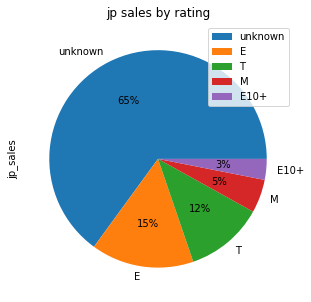

In [112]:
plot = jp.plot.pie(y='jp_sales', autopct='%1.0f%%',title='jp sales by rating', labels=jp['rating'], figsize=(5, 5))

I checked the average sales by rating as well as the total sales by rating. If the effect of the rating on sales was strong I would expect there to be a match between total sales and average. Since there is no match the effect of the rating on sales is probably small

## Test the following hypotheses

In [113]:
xbox = games[(games.platform=='XB')&(games.user_score.notna())&(games.user_score!='tbd')]['user_score'].astype(float)
xbox

/opt/conda/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


78       8.2
129      8.6
466      8.5
508      8.7
569      8.5
        ... 
16194    7.3
16203    3.0
16237    5.1
16239    7.7
16455    7.0
Name: user_score, Length: 714, dtype: float64

In [114]:
pc = games[(games.platform=='PC')&(games.user_score.notna())&(games.user_score!='tbd')]['user_score'].astype(float)
pc

85       7.6
138      7.3
192      4.0
195      7.9
218      8.2
        ... 
16681    8.1
16692    7.6
16696    5.8
16702    7.2
16705    5.8
Name: user_score, Length: 864, dtype: float64

H0: xbox['user_score'].mean() = pc['user_score'].mean()

H1: xbox['user_score'].mean() != pc['user_score'].mean()

In [115]:
from scipy import stats as st
stats.ttest_ind(xbox,pc)

Ttest_indResult(statistic=4.078651890486094, pvalue=4.7559915190973315e-05)

In [116]:
stats.ttest_ind(xbox,pc).pvalue

4.7559915190973315e-05

In [117]:
stats.ttest_ind(xbox,pc).pvalue<0.05

True

Since we rejected the H0 we can say that the average between the different platforms is not equal

In [118]:
action = games[(games.genre=='Action')&(games.user_score.notna())&(games.user_score!='tbd')]['user_score'].astype(float)
action

16       8.2
17       9.0
23       8.1
24       8.7
38       8.5
        ... 
16653    8.4
16654    5.1
16660    6.7
16663    2.4
16692    7.6
Name: user_score, Length: 2593, dtype: float64

In [119]:
sports = games[(games.genre=='Sports')&(games.user_score.notna())&(games.user_score!='tbd')]['user_score'].astype(float)
sports

0        8.0
3        8.0
13       7.7
15       7.4
77       4.3
        ... 
16546    9.5
16622    7.1
16643    6.6
16655    9.1
16676    9.1
Name: user_score, Length: 1771, dtype: float64

H0: action['genre'].mean() = sports['genre'].mean()
H1: action['genre'].mean() != sports['genre'].mean()

In [120]:
stats.ttest_ind(action,sports)

Ttest_indResult(statistic=0.012411504476820798, pvalue=0.9900978740430595)

In [121]:
stats.ttest_ind(action,sports).pvalue

0.9900978740430595

In [122]:
stats.ttest_ind(action,sports).pvalue<0.05

False

Since we can't rejected the H0 we can't say that the average between the different platforms are different

general conclusion: 
From looking at the data some conclusions can be drawn. The games on the various platforms seem to have entered the market slowly but in the 2000s area there started a sharp increase in the sales of the games on the various platforms. It seems that the lifespan of each platform is getting smaller over the years which requires aggressive entry into the market in order to sell as much as possible in as little time as possible as the pace of technology change is increasing. It is necessary to characterize the target audience we are targeting because it can be seen that there are differences in the purchases of the different games between the different cultures. On the marketing side there are places where great importance is attached to the score that can be played by the users and therefore one should pay attention especially in North America that good scores are obtained from the users.